In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

### 2a: Download dataset

In [4]:
Curve = pd.read_csv('USTREASURY-YIELD .csv', index_col = 0, parse_dates = True)

In [5]:
Curve.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2017-12-29,1.28,NaN,1.39,1.53,1.76,1.89,1.98,2.20,2.33,2.40,2.58,2.74
2017-12-28,1.19,NaN,1.39,1.54,1.76,1.91,2.00,2.23,2.36,2.43,2.60,2.75
2017-12-27,1.18,NaN,1.44,1.53,1.75,1.89,1.99,2.22,2.34,2.42,2.59,2.75
2017-12-26,1.24,NaN,1.47,1.52,1.75,1.92,2.02,2.25,2.38,2.47,2.66,2.82
2017-12-22,1.15,NaN,1.33,1.54,1.73,1.91,2.01,2.26,2.40,2.48,2.68,2.83


In [6]:
Curve = Curve.sort_index().loc['2012-03-01':,:]

In [7]:
Curve.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2012-03-01,0.07,NaN,0.08,0.13,0.18,0.30,0.43,0.89,1.44,2.03,2.80,3.15
2012-03-02,0.06,NaN,0.07,0.12,0.17,0.28,0.41,0.84,1.38,1.99,2.77,3.11
2012-03-05,0.07,NaN,0.08,0.14,0.17,0.31,0.43,0.87,1.40,2.00,2.78,3.13
2012-03-06,0.06,NaN,0.08,0.13,0.17,0.30,0.40,0.83,1.35,1.96,2.73,3.08
2012-03-07,0.06,NaN,0.08,0.14,0.18,0.30,0.42,0.85,1.37,1.98,2.76,3.12


### 2a: Remove '1M' & '3M'

In [8]:
Curve = Curve.drop(columns = ['1 MO', '2 MO','3 MO']) #Because the '2 MO' column is all NaN, we also remove this column. 

In [9]:
Curve.head()

,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,
2012-03-01,0.13,0.18,0.30,0.43,0.89,1.44,2.03,2.80,3.15
2012-03-02,0.12,0.17,0.28,0.41,0.84,1.38,1.99,2.77,3.11
2012-03-05,0.14,0.17,0.31,0.43,0.87,1.40,2.00,2.78,3.13
2012-03-06,0.13,0.17,0.30,0.40,0.83,1.35,1.96,2.73,3.08
2012-03-07,0.14,0.18,0.30,0.42,0.85,1.37,1.98,2.76,3.12


### 2b: Perform PCA

#### PCA:
The covariance matrix:
$$\Sigma = cov(\Delta y_{t}^{mkt})$$
Decomposition:
$$\Sigma = E  \Lambda  E^{T}$$
The relationship between factors $F_{t}$ and $\Delta y_{t}^{mkt}$
$$F_{t} = E^{T} \Delta y_{t}^{mkt}$$
$$E F_{t} = \Delta y_{t}^{mkt}$$
#### Explanation:
Sample1: $\Delta y_{t}^{mkt}$  
pca.components_ : $E^{T}$  
pca.explained_variance_ : The diagonal of $\Lambda$

In [10]:
from sklearn.decomposition import PCA
Sample1 = Curve.diff().loc['2012-3-2':'2016-3-1',:] # Get Sample1 from CMT rates move
pca = PCA(n_components = 9)

In [11]:
Sample1.mean() # mean of features

6 MO     0.00037
1 YR     0.00050
2 YR     0.00055
3 YR     0.00055
5 YR     0.00042
7 YR     0.00018
10 YR   -0.00020
20 YR   -0.00052
30 YR   -0.00045
dtype: float64

In [12]:
pca.fit(Sample1) # Cov = E * A * E.Transpose

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
print(pca.components_)  # E.Transpose

[[ 0.02049106  0.04975355  0.1743952   0.26168396  0.38788363  0.44644618
   0.4365832   0.43195375  0.4138305 ]
 [ 0.07959337  0.14347513  0.43000143  0.49784063  0.36233745  0.13534326
  -0.11232162 -0.39893932 -0.46792981]
 [-0.53527341 -0.59009392 -0.36746779 -0.00870765  0.26388562  0.28109713
   0.08090742 -0.13296727 -0.23934414]
 [ 0.52766379  0.2894654  -0.62893779 -0.13609759  0.18869581  0.29729441
   0.15826214 -0.12678159 -0.24204309]
 [-0.64759479  0.72746249 -0.20916909  0.05980833 -0.01530422  0.03275419
   0.00139984 -0.04777742  0.0223353 ]
 [ 0.08462544 -0.10937323 -0.4553518   0.76580395 -0.06638699 -0.291014
  -0.19786456  0.06499631  0.23367455]
 [ 0.01956944  0.03610602 -0.04241389 -0.26917038  0.68724588 -0.16573623
  -0.54692972 -0.05303527  0.3497735 ]
 [ 0.0331248  -0.04816668  0.03043591  0.01683831 -0.25262536  0.3892251
  -0.02953067 -0.69069525  0.54965908]
 [ 0.01666192  0.01227039  0.0163556   0.04805085 -0.26879028  0.59181229
  -0.65270936  0.36623714

In [14]:
print(np.around(pca.explained_variance_, decimals = 5).reshape(9,1)) # The diagonal of A

[[1.134e-02]
 [1.000e-03]
 [2.300e-04]
 [1.400e-04]
 [9.000e-05]
 [8.000e-05]
 [4.000e-05]
 [3.000e-05]
 [3.000e-05]]


In [15]:
print(np.around(pca.explained_variance_ratio_*100, decimals = 2).reshape(9,1)) # Explained variance ratio (%)

[[87.33]
 [ 7.7 ]
 [ 1.77]
 [ 1.1 ]
 [ 0.73]
 [ 0.59]
 [ 0.31]
 [ 0.25]
 [ 0.22]]


### 2c: Analyze the CMT rates move on the Election Day

#### Explanation
move: 
$$\Delta y_{2016-11-9}^{mkt} = y_{2016-11-9}^{mkt} - y_{2016-11-8}^{mkt}$$  
factors: 
$$F_{2016-11-9} = E^{T} (\Delta y_{2016-11-9}^{mkt} - \Delta \bar y_{t}^{mkt}) $$  

movepcak:   
$$\Delta y_{2016-11-9}^{theory} = E F_{2016-11-9} + \Delta \bar y_{t}^{mkt}$$


The shape of the above formula:
$$ (9 \times 1) = (9 \times k) \times (k \times 1) + (9 \times 1) $$

In [16]:
move = Curve.diff().loc['2016-11-9',:] # CMT rates move on Election Day 2016-11-09

In [17]:
factors = pca.components_.dot(move - Sample1.mean()) # Factors Data

In [18]:
move_pca1 = pca.components_.transpose()[:,0].dot(factors[0]) + Sample1.mean()  # move explained by the 1st factor
move_pca2 = pca.components_.transpose()[:,:2].dot(factors[:2]) + Sample1.mean() # move explained by the first 2 factors
move_pca3 = pca.components_.transpose()[:,:3].dot(factors[:3]) + Sample1.mean() # move explained by the first 3 factors

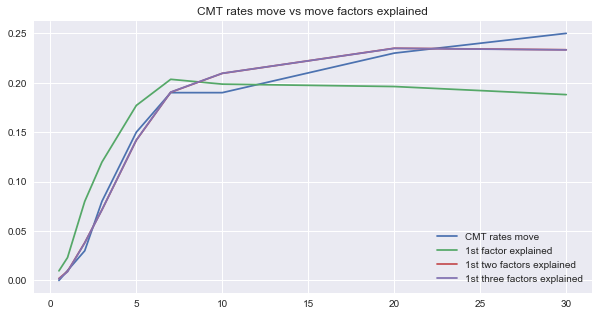

In [19]:
term = [0.5,1,2,3,5,7,10,20,30]
_ = plt.figure(figsize = (10,5))
_ = plt.plot(term, move, label = 'CMT rates move')
_ = plt.plot(term, move_pca1, label = '1st factor explained')
_ = plt.plot(term, move_pca2, label = '1st two factors explained')
_ = plt.plot(term, move_pca3, label = '1st three factors explained')
_ = plt.title('CMT rates move vs move factors explained')
_ = plt.legend()

#### Explanation:
* We know that on the 2016 presidential election day, after Donald Trump won, the CMT rates **all went up** and **the spread between short-term yield and long-term yield became wider**.
* The market expected that Donald Trump would implement expansional fisical policy after becoming the President of the United States, so Treasury bonds went down, pushing up the yield curve.
* From PCA method above, we know that **first pca factor could explain the 87% change of the CMT rates, while the second factor and the third factor's contributions are 7.7% and 1.77% respectively**. And the real results could prove that.
* As we can see, from the figure above, the first factor could explain **the overall directional change** of the CMT rates and the second and third factor could even **distinguish the spread among rates with different maturities**. The more factors we included, the closer the theoretical rates move is with the real rates move.

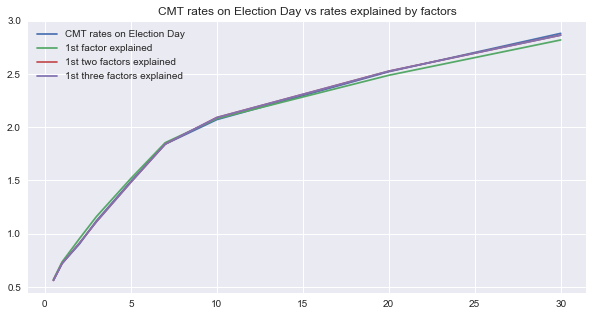

In [20]:
_ = plt.figure(figsize = (10,5))
_ = plt.plot(term, Curve.loc['2016-11-9',:], label = 'CMT rates on Election Day')
_ = plt.plot(term, move_pca1+Curve.loc['2016-11-8',:], label = '1st factor explained')
_ = plt.plot(term, move_pca2+Curve.loc['2016-11-8',:], label = '1st two factors explained ')
_ = plt.plot(term, move_pca3+Curve.loc['2016-11-8',:], label = '1st three factors explained')
_ = plt.title('CMT rates on Election Day vs rates explained by factors')
_ = plt.legend()

### 2d: WFLY1 weights

#### Explanation:
$$pca.components_.transpose()[m,n] = \frac{\partial \Delta y_{(m+1)}^{mkt}}{f_{n+1}}$$

In [21]:
print(pca.components_.transpose()[3,0:2]) # d(3Y)/d(factor1,factor2)
print(pca.components_.transpose()[5,0:2]) # d(7Y)/d(factor1,factor2)
print(pca.components_.transpose()[6,0:2]) # d(10Y)/d(factor1,factor2)

[0.26168396 0.49784063]
[0.44644618 0.13534326]
[ 0.4365832  -0.11232162]


#### Compute the Neutral weights
We know the portfolio can be displayed like:
$$\pi = w_1 \times Y_3 - Y_7 + w_2 \times Y_{10}$$
According to chain rules, risks the portfolio exposed to different factors are:
$$\frac{\partial \pi}{\partial f_1} = \frac{\partial \pi}{\partial \vec y}\times \frac{\partial \vec y}{\partial f_1}$$
So we get:
$$0.2617 \times w_1 - 0.4464 + 0.4366 \times w_2 = 0$$
$$0.4978 \times w_1 - 0.1353 - 0.1123 \times w_2 = 0$$
Suppose:
$$ A = \left(
\begin{matrix}
0.2617 & 0.4366 \\
0.4978 & -0.1123
\end{matrix}
\right)$$
$$w = \left(
\begin{matrix}
w_1 \\
w_2
\end{matrix}
\right)$$
$$b = \left(
\begin{matrix}
0.4464 \\
0.1353
\end{matrix}
\right)$$
Then 
$$w = A^{-1}b$$

In [22]:
b = pca.components_.transpose()[5,0:2].reshape(2,1)
A = pca.components_.transpose()[3:9:3,0:2].transpose()
w = np.dot(np.linalg.inv(A),b) # Aw = b, so w = A-1b

In [23]:
w

array([[0.44270662],
       [0.75723699]])

In [24]:
WFLY1 = w[0]*Curve.loc[:,'3 YR'] + Curve.loc[:,'7 YR'] + w[1]*Curve.loc[:,'10 YR'] # WFLY1 series

/Users/liunayan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


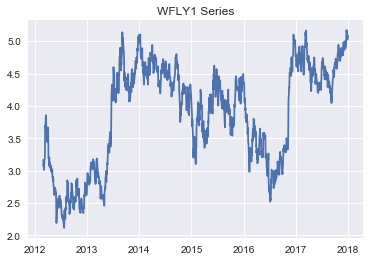

In [25]:
_ = plt.plot(WFLY1.index,WFLY1)
_ = plt.title("WFLY1 Series")

### 2e: WFLY2 weights via Chou-Ng methodology

#### Chou-Ng Method:
$$y_{t-1} = y_{t}A + \epsilon_{t}$$
$$y_{t} = y_{t-1}B + \epsilon_{t}$$
$$C = AB$$
Decomposition:
$$C = E  \Lambda  E^{T}$$
#### Explanation:
eig_val: The diagonal of $\Lambda$  
eig_vec: $E^{T}$  
C: $C$  
w_cca_cn: $(w1,w2)$

In [26]:
import statsmodels.api as sm

def CCA_Chou_Ng(data_set):
    
    #data_set is pandas dataframe
    df_lag = data_set.shift(1).dropna()
    df = data_set.drop(data_set.index[0]).dropna()
    n = len(data_set.columns)
    
    #X(t) ~ M_1 + X(t-1)
    X = df_lag.values
    X_I = sm.add_constant(X)
    Y = df.values
    l1 = sm.OLS(Y,X_I).fit()
    B=l1.params[1:(n+1)]
    
    #X(t-1) ~ M_2 + X(t)
    Y_I = sm.add_constant(Y)
    l2 = sm.OLS(X,Y_I).fit()
    A=l2.params[1:(n+1)]
    C = np.dot(A,B)
    eig_val, eig_vec = np.linalg.eig(C)
    return eig_val, eig_vec, C

In [27]:
butterfly = Curve.loc['2012-3-1':'2016-3-1',['3 YR','7 YR','10 YR']]
val, vec, C = CCA_Chou_Ng(butterfly)

In [28]:
print(val)

[0.88098368 0.99564837 0.98939605]


The first eigenvalue is the lowest eigenvalue, so the first eigenvector is the best mean-reverting weights.

In [29]:
w_cca_cn = [-vec[0,0]/vec[1,0],-vec[2,0]/vec[1,0]]

In [30]:
print(w_cca_cn)

[0.6519405548016614, 0.7941408018582995]


In [31]:
WFLY2_cn = w_cca_cn[0]*Curve.loc[:,'3 YR'] + Curve.loc[:,'7 YR'] + w_cca_cn[1]*Curve.loc[:,'10 YR']

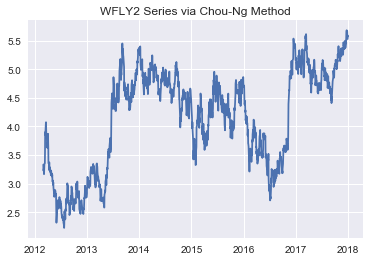

In [32]:
_ = plt.plot(WFLY2_cn.index,WFLY2_cn)
_ = plt.title("WFLY2 Series via Chou-Ng Method")

### 2e: WFLY2 weights via Box-Tiao methodology

#### Box-Tiao Method:
$$y_{t} = y_{t-1}A + \epsilon_{t}$$
$$\Sigma = cov(y_{t})$$
$$Q = \Sigma^{-1} A^{T} \Sigma A$$
Decomposition:
$$Q = E  \Lambda  E^{T}$$
#### Explanation:
eig_val: The diagonal of $\Lambda$  
eig_vec: $E^{T}$  
Q: $Q$  
w_cca_box: $(w1,w2)$

In [33]:
def CCA_Box_Tiao(data_set):
    """Canonical Correlation Analysis via Box-Tiao.
    
    Args:
    data_set: a pandas.DataFrame with shape (n_samples,n_series)
    
    Returns:
    eig_val: a numpy.ndarray with shape (n_series, 1)
    eig_vec: a numpy.ndarray with shape (n_series, n_series)
    Q: a numpy.ndarray with shape (n_series, n_series)
    """
    x = data_set.shift(1)[1:] # Y(t-1)
    y = data_set[1:] # Y(t)
    A = sm.OLS(y,x).fit().params.values # Y(t) = Y(t-1)*A + e(t)
    cov = data_set.cov().values # Covariance Matrix of Y(t)
    Q = np.linalg.multi_dot([np.linalg.inv(cov), A.T, cov, A]) # Q = Cov.inverse * A.T * Cov * A
    
    eig_val, eig_vec = np.linalg.eig(Q) # eigenvalues and eigenvectors of Q
    return eig_val, eig_vec, Q

In [34]:
val, vec, Q = CCA_Box_Tiao(butterfly)

In [35]:
print(val)

[0.97146715 0.99285872 1.01293547]


The first eigenvalue is the lowest eigenvalue, so the first eigenvector is the best mean-reverting weights.

In [36]:
w_cca_box = [-vec[0,0]/vec[1,0],-vec[2,0]/vec[1,0]]

In [37]:
print(w_cca_box)

[0.6815583225030792, 0.7142183644637737]


In [38]:
WFLY2_box = w_cca_box[0]*Curve.loc[:,'3 YR'] + Curve.loc[:,'7 YR'] + w_cca_box[1]*Curve.loc[:,'10 YR']

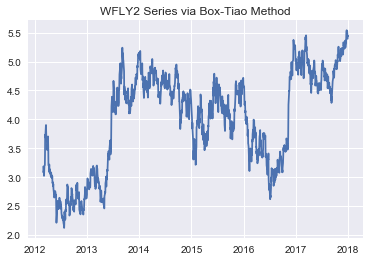

In [39]:
_ = plt.plot(WFLY2_box.index,WFLY2_box)
_ = plt.title("WFLY2 Series via Box-Tiao Method")

### 3: Compute Half-Life and ADF

#### Half-Life
The half-life measures the rate of decay of a mean-reverting process and it is the time taken by a given value to decay to half its long-run mean.
$$y_{t} - y_{t-1} = \alpha + \beta y_{t-1} + \epsilon_{t}$$
$$HalfLife = -\frac{log(2)}{\beta}$$

In [40]:
import math
def HalfLife(s):
    """Calculate the Half Life of mean reversion series.
    Methodology: https://quant.stackexchange.com/questions/25086/calculating-half-life-of-mean-reverting-series-with-python
    
    Args:
    s: pandas.Series
    
    Returns:
    HF: float
    """
    
    x = s.shift()[1:] # Y(t-1)
    y = s.diff()[1:] # Y(t) - Y(t-1)
    x = sm.add_constant(x) #adds intercept terms to X variable for regression
    x.columns = ['const','x'] # Y(t) - Y(t-1) = intercept + slope *Y(t-1) + e
    slope = sm.OLS(y,x).fit().params[1] 
    HF = -math.log(2) / slope # Half-life = - log(2)/slope
    return HF

In [41]:
print("The half life of series WFLY1 is:", np.around(HalfLife(WFLY1),decimals = 2))

The half life of series WFLY1 is: 107.23


/Users/liunayan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
print("The half life of series WFLY2 via Chou-Ng is:", np.around(HalfLife(WFLY2_cn),decimals = 2))

The half life of series WFLY2 via Chou-Ng is: 111.66


In [43]:
print("The half life of series WFLY2 via Box-Tiao is:", np.around(HalfLife(WFLY2_box),decimals = 2))

The half life of series WFLY2 via Box-Tiao is: 114.12


#### ADF test
The ADF test measures the stationarity of a series and is one of unit root tests.  
The null hypothesis of the ADF test is that the series has unit root so it is non-stationary.  
So if the p-value of the test is more than the significance level, we cannot reject the null hypothesis and we think that the series tested is non-stationary.

In [44]:
import statsmodels.tsa.stattools as ts
def adftest(s):
    """Do the Augmented Dickey-Fuller test of series.
     
    Args:
    s: pandas.Series
    
    Returns:
    The p-value of the test and criterions under different significance levels.
    """
    test = ts.adfuller(s,1)
    print("The p-value of this ADF test is:",np.around(test[1],decimals = 2))

In [45]:
adftest(WFLY1)

The p-value of this ADF test is: 0.28


In [46]:
adftest(WFLY2_cn)

The p-value of this ADF test is: 0.3


In [47]:
adftest(WFLY2_box)

The p-value of this ADF test is: 0.32


### 4: Out-of-sample test
* WFLY1t3 is the out-of-sample series of WFLY1 using 3-month period
* WFLY1t6 is the out-of-sample series of WFLY1 using 6-month period
* WFLY2_cnt3 is the out-of-sample series of WFLY2 via Chou-Ng using 3-month period
* WFLY2_cnt6 is the out-of-sample series of WFLY2 via Chou-Ng using 6-month period
* WFLY2_boxt3 is the out-of-sample series of WFLY2 via Box-Tiao using 3-month period
* WFLY2_boxt6 is the out-of-sample series of WFLY2 via Box-Tiao using 6-month period

In [48]:
Test3 = Curve['2016-3-2':'2016-6-2'] # Out-of-sample 3 month
Test6 = Curve['2016-3-2':'2016-9-2'] # Out-of-sample 6 month

In [49]:
WFLY1t3 = w[0]*Test3.loc[:,'3 YR'] + Test3.loc[:,'7 YR'] + w[1]*Test3.loc[:,'10 YR']
WFLY1t6 = w[0]*Test6.loc[:,'3 YR'] + Test6.loc[:,'7 YR'] + w[1]*Test6.loc[:,'10 YR']
WFLY2_cnt3 = w_cca_cn[0]*Test3.loc[:,'3 YR'] + Test3.loc[:,'7 YR'] + w_cca_cn[1]*Test3.loc[:,'10 YR']
WFLY2_cnt6 = w_cca_cn[0]*Test6.loc[:,'3 YR'] + Test6.loc[:,'7 YR'] + w_cca_cn[1]*Test6.loc[:,'10 YR']
WFLY2_boxt3 = w_cca_box[0]*Test3.loc[:,'3 YR'] + Test3.loc[:,'7 YR'] + w_cca_box[1]*Test3.loc[:,'10 YR']
WFLY2_boxt6 = w_cca_box[0]*Test6.loc[:,'3 YR'] + Test6.loc[:,'7 YR'] + w_cca_box[1]*Test6.loc[:,'10 YR']

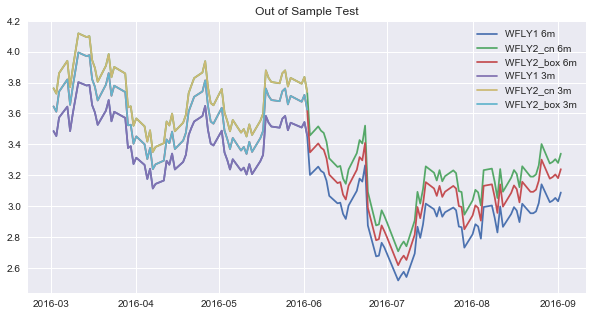

In [50]:
_ = plt.figure(figsize = (10,5))
_ = plt.plot(WFLY1t6.index, WFLY1t6, label = 'WFLY1 6m')
_ = plt.plot(WFLY1t6.index, WFLY2_cnt6, label = 'WFLY2_cn 6m')
_ = plt.plot(WFLY1t6.index, WFLY2_boxt6, label = 'WFLY2_box 6m')
_ = plt.plot(WFLY1t3.index, WFLY1t3, label = 'WFLY1 3m')
_ = plt.plot(WFLY1t3.index, WFLY2_cnt3, label = 'WFLY2_cn 3m')
_ = plt.plot(WFLY1t3.index, WFLY2_boxt3, label = 'WFLY2_box 3m')
_ = plt.title('Out of Sample Test')
_ = plt.legend()

In [51]:
print('The Half life of the series is:',np.around(HalfLife(WFLY1t3),decimals = 2))
adftest(WFLY1t3)

The Half life of the series is: 5.45
The p-value of this ADF test is: 0.26


In [52]:
print('The Half life of the series is:',np.around(HalfLife(WFLY1t6),decimals = 2))
adftest(WFLY1t6)

The Half life of the series is: 13.59
The p-value of this ADF test is: 0.34


In [53]:
print('The Half life of the series is:',np.around(HalfLife(WFLY2_cnt3),decimals = 2))
adftest(WFLY2_cnt3)

The Half life of the series is: 5.55
The p-value of this ADF test is: 0.27


In [54]:
print('The Half life of the series is:',np.around(HalfLife(WFLY2_cnt6),decimals = 2))
adftest(WFLY2_cnt6)

The Half life of the series is: 13.29
The p-value of this ADF test is: 0.33


In [55]:
print('The Half life of the series is:',np.around(HalfLife(WFLY2_boxt3),decimals = 2))
adftest(WFLY2_boxt3)

The Half life of the series is: 5.61
The p-value of this ADF test is: 0.28


In [56]:
print('The Half life of the series is:',np.around(HalfLife(WFLY2_boxt6),decimals = 2))
adftest(WFLY2_boxt6)

The Half life of the series is: 13.11
The p-value of this ADF test is: 0.32


#### Comparison
* From the figure above, we know series WFLY from different methods have different levels but **the nearly same trends**.
* According to ADF test, all of series, no matter how their weights are or how long the out-of-sample periods are, they are **all non-stationary**. Perhaps the changing economics environments have an impact on their long-run mean, all series shows different mean at different time, leading to non-stationarity.
* From the perspective of Half life, **the longer the period is, the longer the Half Life is**. It might reveal that when the economic environment changes, series have to spend more time on approaching the new long-run mean. 